In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
data = pd.read_csv('covtype.csv')

In [28]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [30]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


C:\Users\aduko\AppData\Local\Temp\ipykernel_30108\1304959655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Cover_Type', palette='viridis')


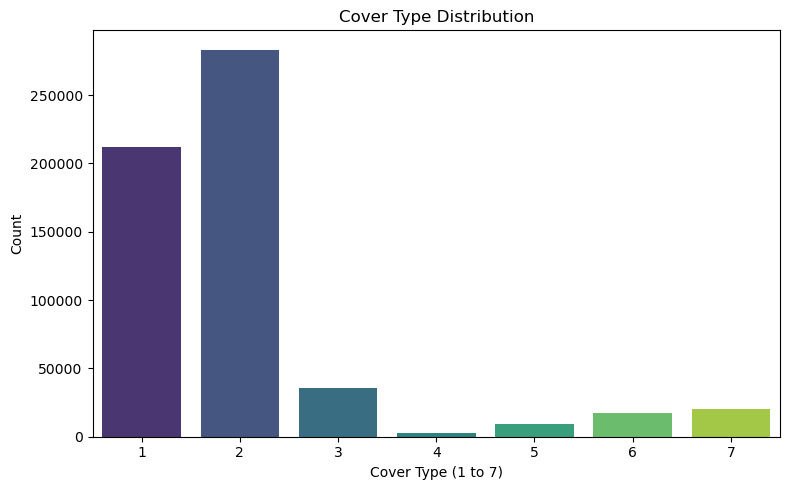

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Cover_Type', palette='viridis')
plt.title("Cover Type Distribution")
plt.xlabel("Cover Type (1 to 7)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

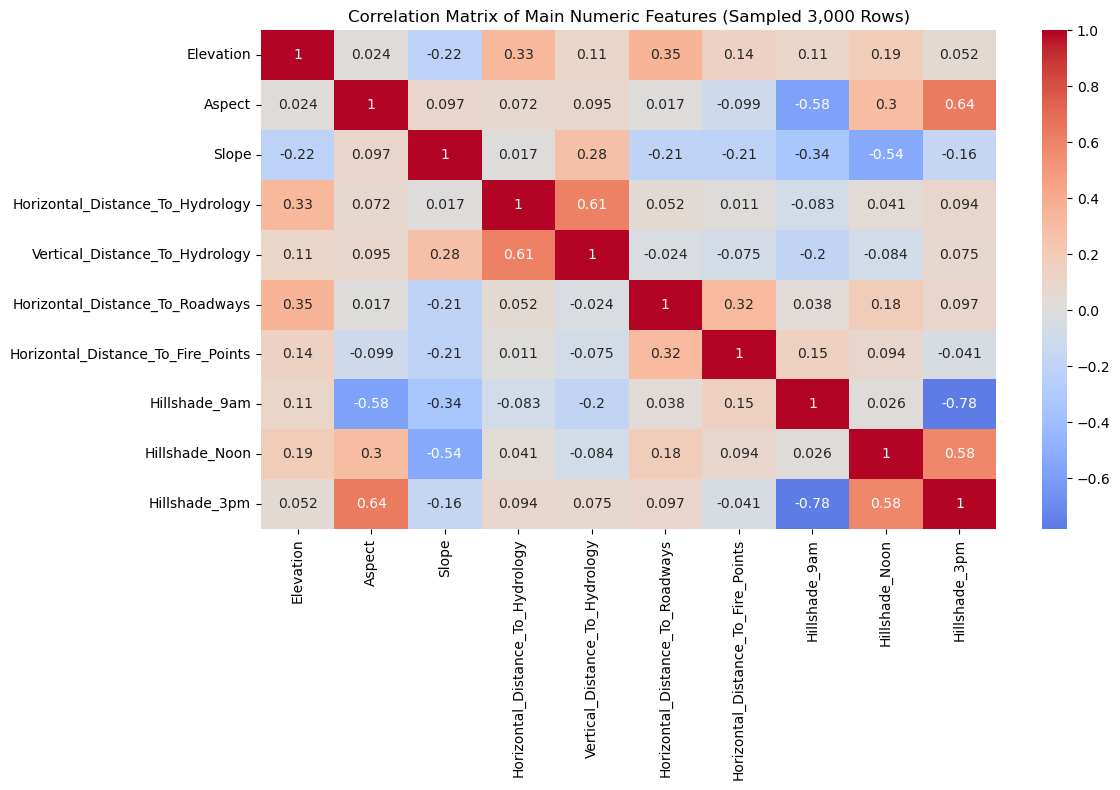

In [33]:
#Correlation heatmap based on first 3,000 rows
corr_data = data.sample(n=3000, random_state=42)

#define the main numeric features (excluding one-hot encoded columns, e.g soil type columns)
numeric_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'
]

#select only these numeric features
sample_numeric = corr_data[numeric_features]

#get the correlation matrix
correlation_matrix = sample_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Main Numeric Features (Sampled 3,000 Rows)")
plt.tight_layout()
plt.show()

In [49]:
#Logistic Regression
X = data.drop(columns=["Cover_Type"])
y = data['Cover_Type']

#scale the features for better fit
scaler = StandardScaler()
X = scaler.fit_transform(X) 

#train-test split using scaled data
X_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

#train
logmodel = LogisticRegression(max_iter=1000)

#fit data to model
logmodel.fit(X_train, y_train)

#predictions
predictions  = logmodel.predict(x_test)

#evaluations
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Confusion Matrix:
 [[29542 12004    15     0     0    14   793]
 [10224 45329   720     3    44   314    27]
 [    0   725  5725   137     9   555     0]
 [    0     3   233   238     0    75     0]
 [    5  1818    56     0    10    10     0]
 [    0   811  1698    12     3   949     0]
 [ 1780    40     0     0     0     0  2282]]

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.68      0.80      0.73      7151
           4       0.61      0.43      0.51       549
           5       0.15      0.01      0.01      1899
           6       0.50      0.27      0.35      3473
           7       0.74      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



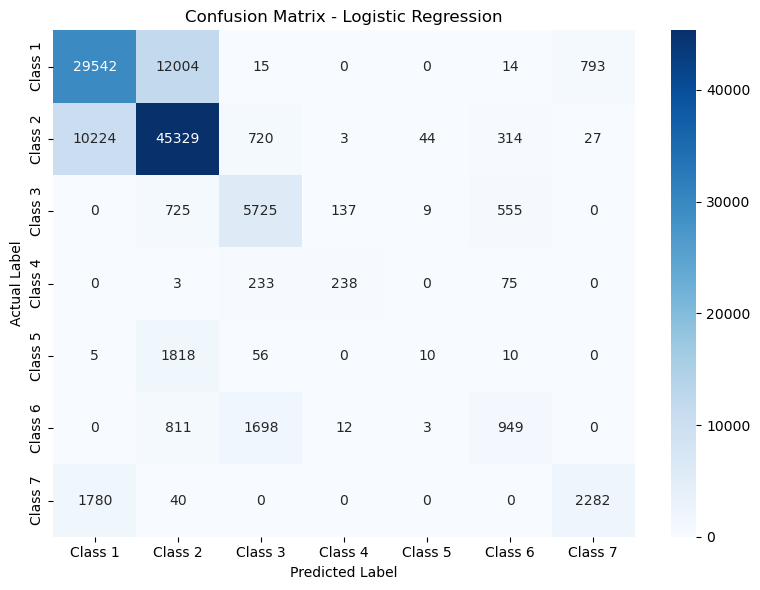

In [53]:
#heatmap for confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

## Random Forest

In [68]:
X = data.drop(columns=["Cover_Type"])
y = data['Cover_Type']

#train-test split using scaled data
X_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

#train
rfc = RandomForestClassifier(n_estimators=100, random_state=421)

#fit data to model
rfc.fit(X_train, y_train)

#predictions
predictions  = rfc.predict(x_test)

#evaluations
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Confusion Matrix:
 [[39925  2342     1     0     5     0    95]
 [ 1272 55146   103     1    59    66    14]
 [    1   124  6870    25    10   121     0]
 [    0     0    62   465     0    22     0]
 [   26   381    20     0  1462    10     0]
 [    5    92   249    20     5  3102     0]
 [  194    26     0     0     0     0  3882]]

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.90      0.92    116203
weighted avg       0.95      0.95      0.95    116203



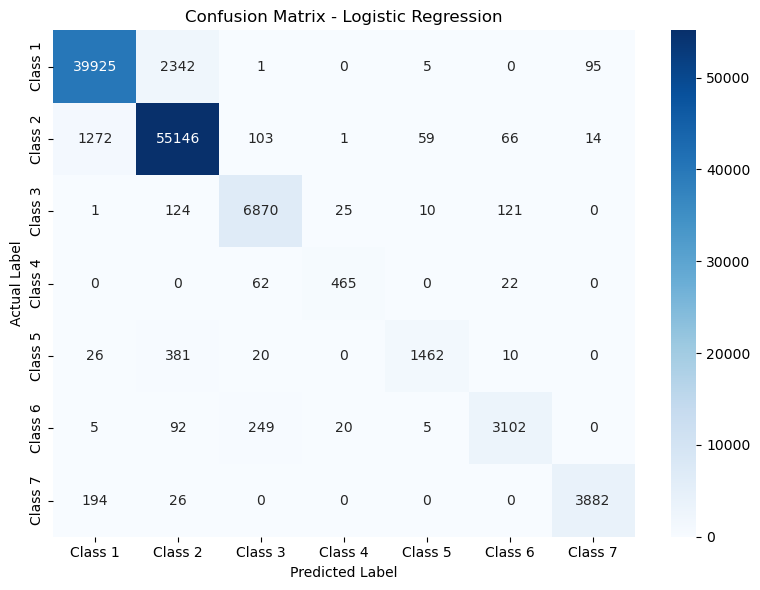

In [70]:
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

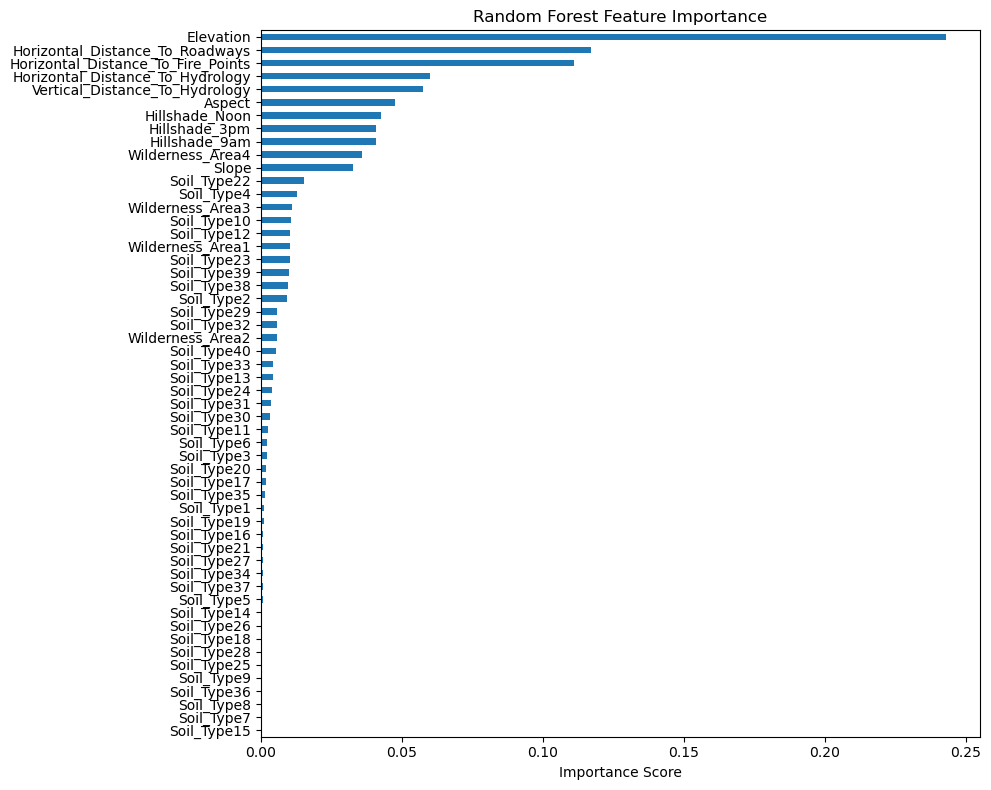

In [77]:
rfc_importance = pd.Series(rfc.feature_importances_, index=X.columns)
rfc_importance.sort_values().plot(kind='barh', title='Random Forest Feature Importance', figsize=(10, 8))
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## XGBoost

In [87]:
X = data.drop(columns=["Cover_Type"])

# Set target and adjust it for XGBoost (labels must start at 0)
y = data['Cover_Type'] - 1

#train-test split using scaled data
X_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

#train
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42, verbosity=0)

#fit data to model
xgb.fit(X_train, y_train)

#predictions
predictions  = xgb.predict(x_test)

#evaluations
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Confusion Matrix:
 [[35619  6550     4     0    25     6   164]
 [ 5311 50786   268     1   116   149    30]
 [    5   302  6504    40     2   298     0]
 [    0     0    52   471     0    26     0]
 [   19   686    28     0  1154    12     0]
 [    4   223   453    24     1  2768     0]
 [  331    22     0     0     0     0  3749]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



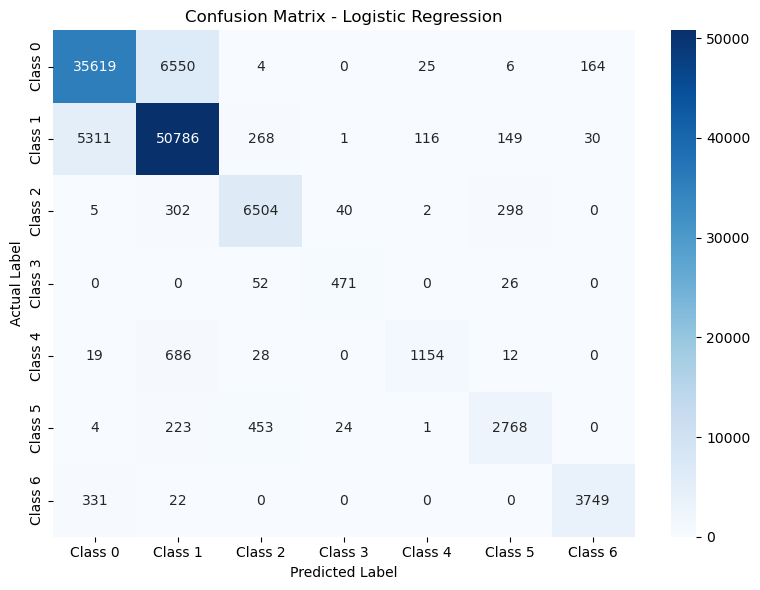

In [89]:
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

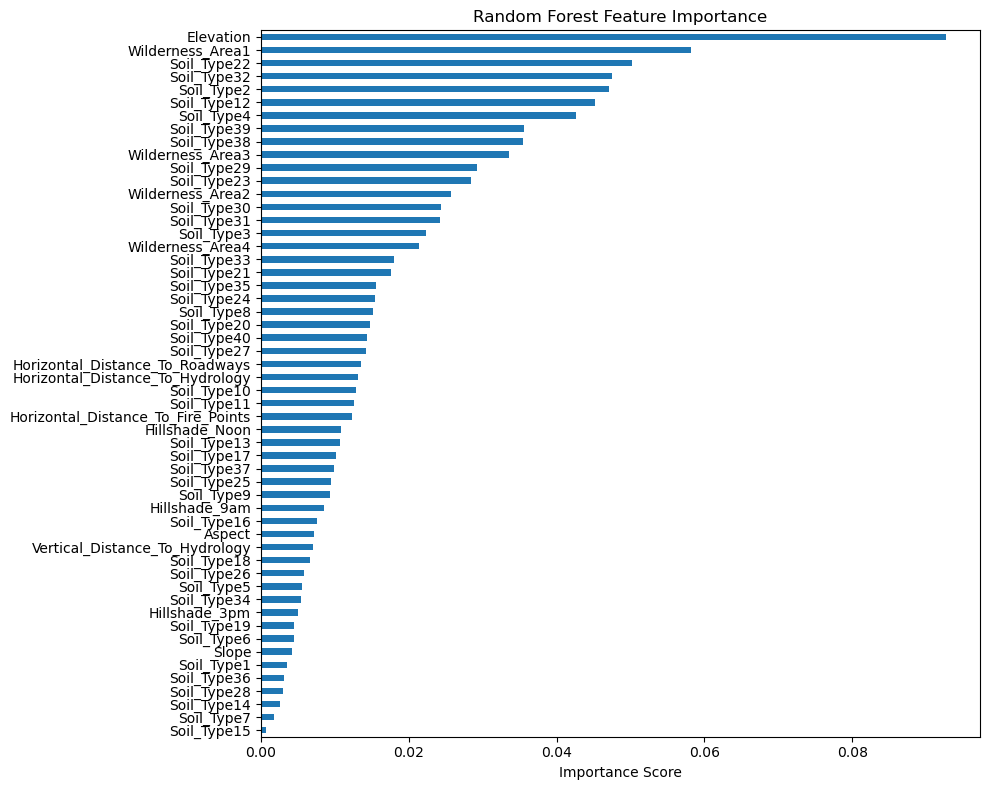

In [91]:
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importance.sort_values().plot(kind='barh', title='Random Forest Feature Importance', figsize=(10, 8))
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()